Siloco about HPV topic
=====

## Tổng quan

### Xem tình hình nghiên cứu về virus HPV

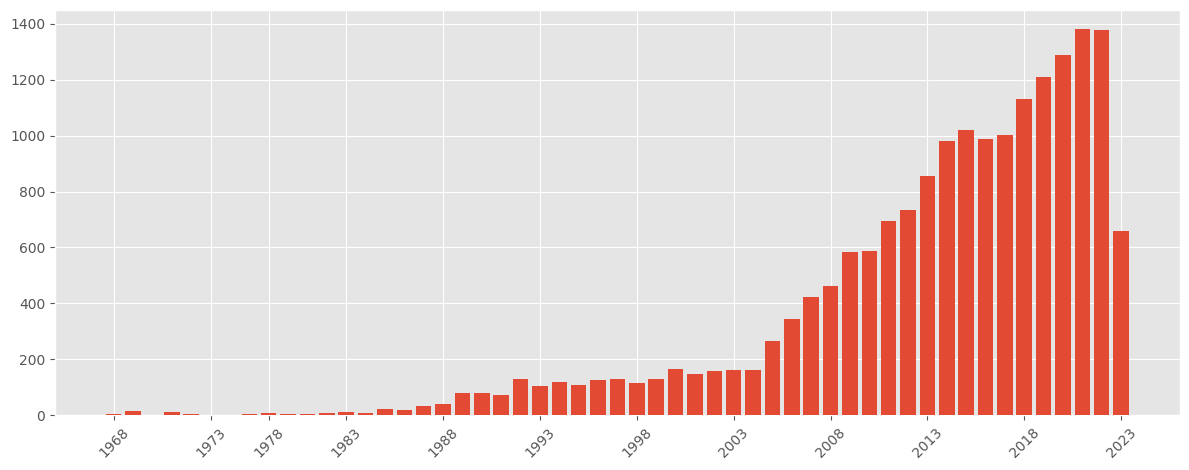

In [3]:
from modules import graph_years as drawNCBI


table = drawNCBI.YearCount('HPV[Title]')
drawNCBI.plt.style.use('ggplot')
drawNCBI.PrintPlot(table)

## Vẽ đồ thị về nghiên cứu về số lượng các chủng HPV

### Lấy dữ liệu

In [1]:
from modules import graph_years as drawNCBI
import pandas as pd
from modules import mylog

the_log = mylog.my_log(__name__)


def Take_Data_HPV(num_type):         # Return data HPV 
    table = pd.DataFrame()

    i = 1
    while True:
        table_tem = drawNCBI.YearCount(f"HPV{i}").rename({'Count':f'HPV{i}'}, axis=1)

        if len(table) != 0:
            table = pd.merge(table, table_tem, how='outer')
        else:
            table = table_tem
        
        if i== num_type:
            break
        else:
            the_log.logger.info(f"got HPV{i}")

        i += 1
    return table

max_type = 200
table = Take_Data_HPV(max_type)
table.to_csv('data_HPV.csv', index=False)

INFO |2023-06-18 06:43:42,983| __main__: 
 got HPV1
--------------------------------------------------
INFO |2023-06-18 06:43:44,657| __main__: 
 got HPV2
--------------------------------------------------
INFO |2023-06-18 06:43:46,687| __main__: 
 got HPV3
--------------------------------------------------
INFO |2023-06-18 06:43:48,228| __main__: 
 got HPV4
--------------------------------------------------
INFO |2023-06-18 06:43:49,849| __main__: 
 got HPV5
--------------------------------------------------
INFO |2023-06-18 06:43:53,344| __main__: 
 got HPV6
--------------------------------------------------
INFO |2023-06-18 06:43:54,472| __main__: 
 got HPV7
--------------------------------------------------
INFO |2023-06-18 06:43:57,453| __main__: 
 got HPV8
--------------------------------------------------
INFO |2023-06-18 06:43:58,870| __main__: 
 got HPV9
--------------------------------------------------
INFO |2023-06-18 06:44:00,081| __main__: 
 got HPV10
--------------------

### Vẽ đồ thị 

In [4]:
import pandas as pd

table = pd.read_csv('data_HPV.csv', index_col='Year').fillna(0)
table.head()

,HPV1,HPV2,HPV3,HPV4,HPV5,HPV6,HPV7,HPV8,HPV9,HPV10,...,HPV191,HPV192,HPV193,HPV194,HPV195,HPV196,HPV197,HPV198,HPV199,HPV200
Year,,,,,,,,,,,,,,,,,,,,,
1977,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,4.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979,3.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,2.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,2.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Tổng số lượng nghiên cứu ở mỗi chủng HPV  

In [8]:
import pandas as pd
import math

sum_hpv_article = []

for column in table:
    sum_hpv_article.append(sum(table[column]))        

sum_table = pd.DataFrame({
    'name_HPV': [f'HPV-{i}' for i in range(1,max_type+1)],
    'publish_count': sum_hpv_article
}).sort_values('publish_count', ascending=False)


sum_table.head()

,name_HPV,publish_count
15,HPV-16,14553.0
17,HPV-18,5305.0
5,HPV-6,1314.0
10,HPV-11,904.0
30,HPV-31,844.0


In [12]:
## Cut of type have pub less than cut_off value
cut_off = 10

sum_table_cf = sum_table[sum_table['publish_count']>cut_off] 
sum_table_cf

,name_HPV,publish_count
15,HPV-16,14553.0
17,HPV-18,5305.0
5,HPV-6,1314.0
10,HPV-11,904.0
30,HPV-31,844.0
...,...,...
14,HPV-15,11.0
16,HPV-17,11.0
35,HPV-36,11.0
33,HPV-34,11.0


In [13]:
sum_table_log = sum_table_cf.copy()
sum_table_log['publish_count'] = sum_table_log['publish_count'].apply(lambda x: math.log(x))
sum_table_log.head()

,name_HPV,publish_count
15,HPV-16,9.585552
17,HPV-18,8.576405
5,HPV-6,7.180831
10,HPV-11,6.806829
30,HPV-31,6.738152


Repare for drawing

In [14]:
def super(lista):
    result = []
    for index, lis in enumerate(lista):
        result.append(sum(lista[:index])+lis)
    return result
# print(super([1,2,3,5]))

sum_table_repared = sum_table_log.copy()

max_width = 0.5
max_repu = max(sum_table_log["publish_count"])

sum_table_repared["distance"] = sum_table_repared["publish_count"]*max_width*2/max_repu
sum_table_repared["x_axis"] = super(sum_table_repared["distance"])
sum_table_repared["width"] = sum_table_repared["publish_count"]*max_width/max_repu
sum_table_repared['color_cmap'] = sum_table['publish_count']

sum_table_repared

,name_HPV,publish_count,distance,x_axis,width,color_cmap
15,HPV-16,9.585552,1.000000,1.000000,0.500000,14553.0
17,HPV-18,8.576405,0.894722,1.894722,0.447361,5305.0
5,HPV-6,7.180831,0.749131,2.643853,0.374565,1314.0
10,HPV-11,6.806829,0.710113,3.353966,0.355057,904.0
30,HPV-31,6.738152,0.702949,4.056915,0.351474,844.0
...,...,...,...,...,...,...
14,HPV-15,2.397895,0.250157,27.928671,0.125079,11.0
16,HPV-17,2.397895,0.250157,28.178828,0.125079,11.0
35,HPV-36,2.397895,0.250157,28.428985,0.125079,11.0
33,HPV-34,2.397895,0.250157,28.679143,0.125079,11.0


Drawing data

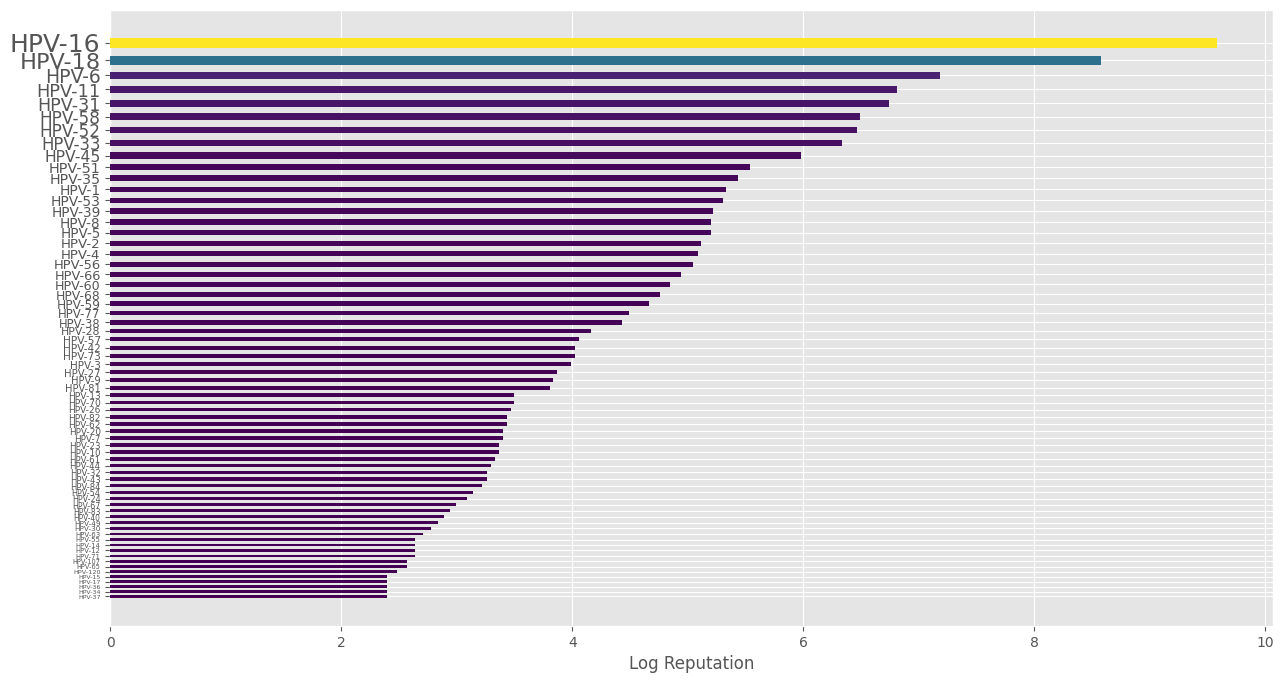

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl


plt.style.use('ggplot')

max_font = 18

plt.figure(figsize=(15,8))


cmap = mpl.colormaps["viridis"]
norm = mpl.colors.Normalize(vmin=min(sum_table['publish_count']), vmax=max(sum_table['publish_count']))


sum_table_repared.apply(lambda x: plt.barh(x["x_axis"],
                                           x["publish_count"], 
                                           height=x["width"], 
                                           color=cmap(norm(x["color_cmap"])), 
                                           zorder=3), 
                                           axis=1)

plt.yticks(sum_table_repared["x_axis"], sum_table_repared["name_HPV"])

for ticklabel, size in zip(plt.gca().get_yticklabels(), sum_table_repared["distance"]):
    ticklabel.set_fontsize(size*max_font)

plt.gca().invert_yaxis()
plt.xlabel("Log Reputation")
plt.grid(zorder=0, axis="x")
plt.savefig('Total_pub_oftypes', bbox_inches='tight', dpi=400)
# plt.plot();

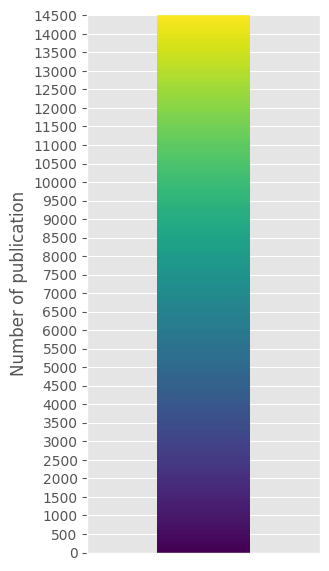

In [87]:
import numpy as np

## Draw right color bar

plt.figure(figsize=[3,7])

bar_base2 = 0
max_val = max(sum_table['publish_count'])
for i in range(1, int(max_val),100):
    plt.bar(1, 100, width=0.4, bottom = bar_base2, color=cmap(norm(i)))
    bar_base2 += 100

plt.ylim([1, max_val])
plt.xlim([0.5, 1.5])
plt.xticks([])
plt.yticks(np.arange(0,max_val,500))
plt.ylabel('Number of publication')
plt.savefig('Bar_color1.png', bbox_inches='tight', dpi=400)
# plt.show()


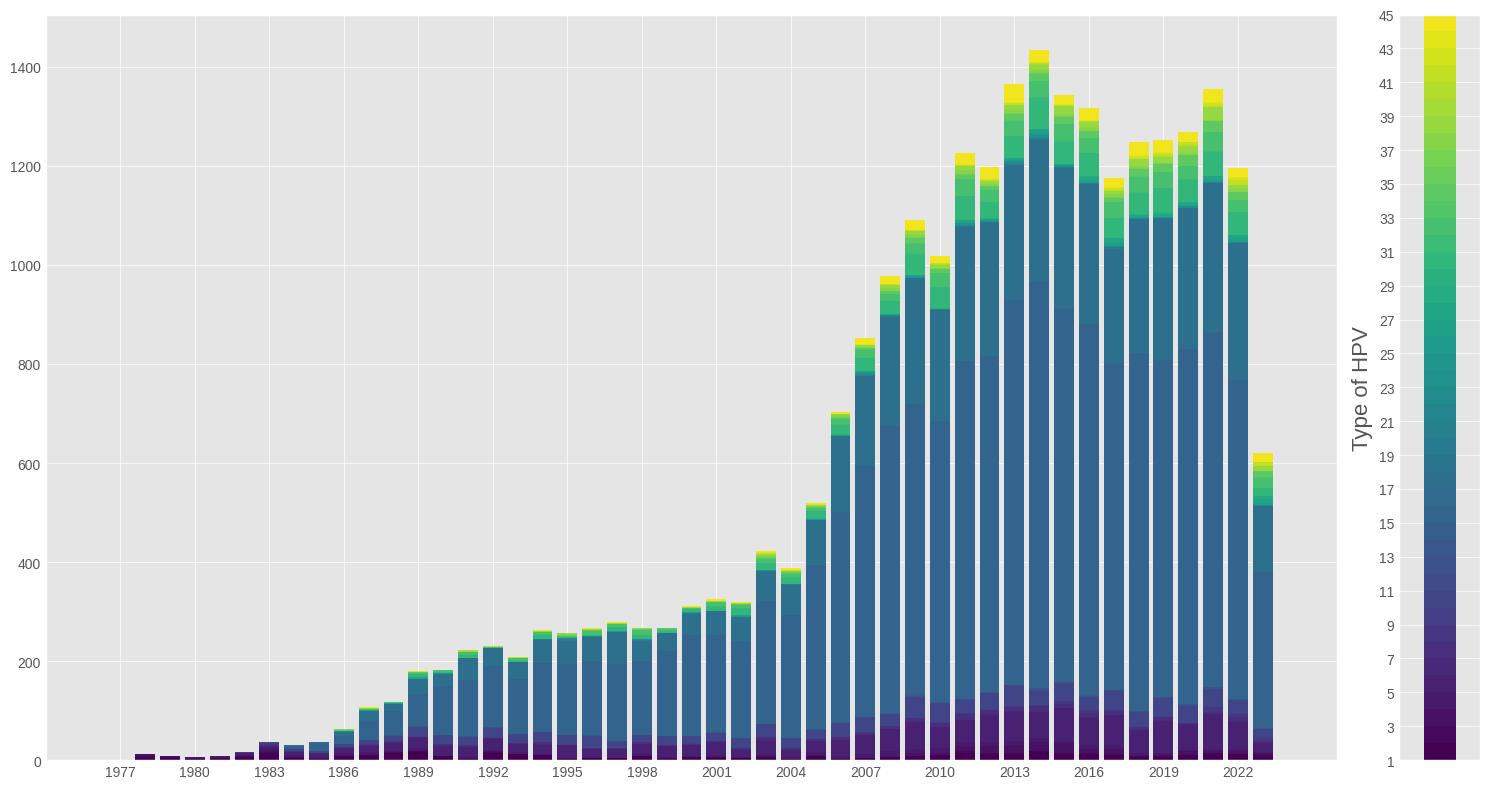

In [66]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.style.use('ggplot')

## Set up fig, use subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8), 
                               gridspec_kw={'width_ratios': [16, 1]}, 
                               frameon=True)


## Set up palette color 
val_max= 45
val_min= 1

cmap = mpl.colormaps["viridis"]
norm = mpl.colors.Normalize(vmin=val_min, vmax=val_max)

## Draw left graph
bar_base = np.zeros(len(table))
for index, column in enumerate(table):
    ax1.bar(table.index, table[column], bottom = bar_base, color=cmap(norm(index)))
    bar_base += np.array(table[column])

ax1.set_xticks(np.arange(min(table.index), max(table.index)+2, 3), fontcolor='b')
ax1.set_xlim([min(table.index)-3, max(table.index)+3])

## Draw right color bar
bar_base2 = 1
for i in range(1, 45):
    ax2.bar(1, 1, width=0.4, bottom = bar_base2, color=cmap(norm(i)))
    bar_base2 += 1

ax2.set_ylim([1, 45])
ax2.set_xlim([0.5, 1.5])
ax2.set_xticks([])
ax2.set_yticks(np.arange(1,47,2))
ax2.set_ylabel('Type of HPV', fontsize=16)


## Show image
fig.tight_layout()
plt.show()
# plt.savefig('HPV_types_per_year.png', dpi=300)